In [1]:
version()

'SageMath version 9.5, Release Date: 2022-01-30'

In [2]:
%display latex

In [3]:
import time
comput_time0 = time.perf_counter()

In [4]:
M = Manifold(4, 'M', structure='Lorentzian')#Riem will be projected here **

In [5]:
X.<t,r,th,ph> = M.chart(r"t r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi")#Schwarzchild-Droste coordinates
X

Chart (M, (t, r, th, ph))

In [6]:
X[:]

(t, r, th, ph)

In [7]:
m = var('m')#body's mass
assume(m>=0)#positive mass

In [8]:
#2*m/r:
#1) schwartzschild radius ||
#2) path of objects with local v > c would follow, relative to path c would follow, locally
#3) how much an object "loses" in time, and "gains" when locally changing basis vectors

In [9]:
g = M.metric()# for G~c and G/c ~ 1
g[0,0] = -(1-2*m/r)#percentage of "time" lost per movement, when c*t is multiplied
g[1,1] = 1/(1-2*m/r)#percentage of "radius" gained, when r is multiplied
g[2,2] = r^2#transform angle to arc
g[3,3] = (r*sin(th))^2#horizontal arc to vertical arc
g.display()

g = (2*m/r - 1) dt⊗dt - 1/(2*m/r - 1) dr⊗dr + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

In [10]:
g[:]

[     2*m/r - 1              0              0              0]
[             0 -1/(2*m/r - 1)              0              0]
[             0              0            r^2              0]
[             0              0              0  r^2*sin(th)^2]

In [11]:
g.christoffel_symbols_display()#integratiom of g local basis vectors across world lines

Gam^t_t,r = -m/(2*m*r - r^2) 
Gam^r_t,t = -(2*m^2 - m*r)/r^3 
Gam^r_r,r = m/(2*m*r - r^2) 
Gam^r_th,th = 2*m - r 
Gam^r_ph,ph = (2*m - r)*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th)

In [12]:
R = g.riemann()#integration of christoffel across a volume of influence around the massive body
R.display_comp(only_nonredundant=True)

Riem(g)^t_r,t,r = -2*m/(2*m*r^2 - r^3) 
Riem(g)^t_th,t,th = -m/r 
Riem(g)^t_ph,t,ph = -m*sin(th)^2/r 
Riem(g)^r_t,t,r = -2*(2*m^2 - m*r)/r^4 
Riem(g)^r_th,r,th = -m/r 
Riem(g)^r_ph,r,ph = -m*sin(th)^2/r 
Riem(g)^th_t,t,th = (2*m^2 - m*r)/r^4 
Riem(g)^th_r,r,th = -m/(2*m*r^2 - r^3) 
Riem(g)^th_ph,th,ph = 2*m*sin(th)^2/r 
Riem(g)^ph_t,t,ph = (2*m^2 - m*r)/r^4 
Riem(g)^ph_r,r,ph = -m/(2*m*r^2 - r^3) 
Riem(g)^ph_th,th,ph = -2*m/r

In [13]:
#Eddington-Finkelstein coordinate
#Same as Schwarzchild-Droste coordinates, but with a Null geodesic time(light) rate:
EF.<T, r, th, ph> = M.chart(r"T r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi:periodic")
X_to_EF = X.transition_map(EF, [t +2*m*ln(abs(r/(2*m)-1)), r, th, ph])
X_to_EF.display()

T = 2*m*log(abs(1/2*r/m - 1)) + t
r = r
th = th
ph = ph

In [14]:
#A test body in EF plunging into the massive body from X's Pov

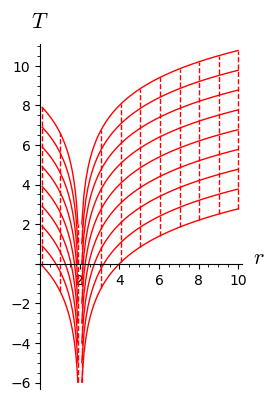

In [15]:
plot1 = X.plot(EF, ranges={t:(0, 8), r:(2.1, 10)}, fixed_coords={th:pi/2, ph:0}, 
                ambient_coords=(r,T), style={t:'--', r:'-'}, parameters={m: 1}) \
        + X.plot(EF, ranges={t:(0, 8), r:(0.1, 1.9)}, fixed_coords={th:pi/2, ph:0}, 
                  ambient_coords=(r,T), number_values={t: 9, r: 3},
                  style={t:'--', r:'-'}, parameters={m: 1})
plot1#calculates christoffel of X to EF for every int value in range(iterative)

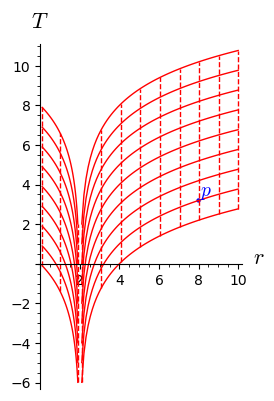

In [16]:
p = M((m, 8*m, pi/2, 0.0000000000001), name='p')

plot1 += p.plot(EF, color='blue', ambient_coords=(r,T), 
                parameters={m: 1}, label_offset=0.4, fontsize=14)
plot1

In [17]:
#**: project Riem on manifold

In [18]:
#parts of space around the massive body where we will test riem's influnce
#"Sub-Manifolds" to M, flat prior to projection, with coordinates same to X
regI = M.open_subset('R_I', r'\mathcal{R}_{\mathrm{I}}')
regII = M.open_subset('R_II', r'\mathcal{R}_{\mathrm{II}}')
regIII = M.open_subset('R_III', r'\mathcal{R}_{\mathrm{III}}')
regIV = M.open_subset('R_IV', r'\mathcal{R}_{\mathrm{IV}}')
regI, regII, regIII, regIV

(Open subset R_I of the 4-dimensional Lorentzian manifold M,
 Open subset R_II of the 4-dimensional Lorentzian manifold M,
 Open subset R_III of the 4-dimensional Lorentzian manifold M,
 Open subset R_IV of the 4-dimensional Lorentzian manifold M)

In [19]:
regI_II = regI.union(regII) ; regI_II

Open subset R_I_union_R_II of the 4-dimensional Lorentzian manifold M

In [20]:
#restrict Regs Portions of X
X_I = X.restrict(regI, r>2*m)
X_II = X.restrict(regII, r<2*m)
M.atlas()#[General coordinate System, R1_R2 subpace coordinates, R1, R2 specifics]

[Chart (M, (t, r, th, ph)),
 Chart (M, (T, r, th, ph)),
 Chart (R_I, (t, r, th, ph)),
 Chart (R_II, (t, r, th, ph))]

In [21]:
M.frames()#basics vectors for each portion of space

[Coordinate frame (M, (∂/∂t,∂/∂r,∂/∂th,∂/∂ph)),
 Coordinate frame (M, (∂/∂T,∂/∂r,∂/∂th,∂/∂ph)),
 Coordinate frame (R_I, (∂/∂t,∂/∂r,∂/∂th,∂/∂ph)),
 Coordinate frame (R_II, (∂/∂t,∂/∂r,∂/∂th,∂/∂ph))]

In [22]:
M.set_default_frame(regI_II.default_frame())#set experimental sub-space as default space
M.default_frame()

Coordinate frame (R_I, (∂/∂t,∂/∂r,∂/∂th,∂/∂ph))

In [23]:
v = regI.vector_field('v')#vectors acting on a test object in Reg_1 subspace
v[0] = 1
v[1] = 1 - 2*m/r
# unset components are zero   
v.display()

v = ∂/∂t + (-2*m/r + 1) ∂/∂r

In [24]:
s = g(v, v)
s.display()

g(v,v): R_I → ℝ
   (t, r, th, ph) ↦ 0

In [25]:
nab = g.connection()#connects test body v in region Reg1 to M 
nab(g).display()#0 if there's no difference between coordinate sets

nabla_g(g) = 0

In [26]:
Ric = g.ricci()#measures difference between Rs and m 
print(Ric)

Field of symmetric bilinear forms Ric(g) on the 4-dimensional Lorentzian manifold M


In [27]:
k = M.vector_field(1, -1, 0, 0, frame=EF.frame(), name='k')#1st 4 arguments are the null geodesic vectorfield
k.display()#Basis Vectors from the EF coordinate frame to M

k = -r/(2*m - r) ∂/∂t - ∂/∂r

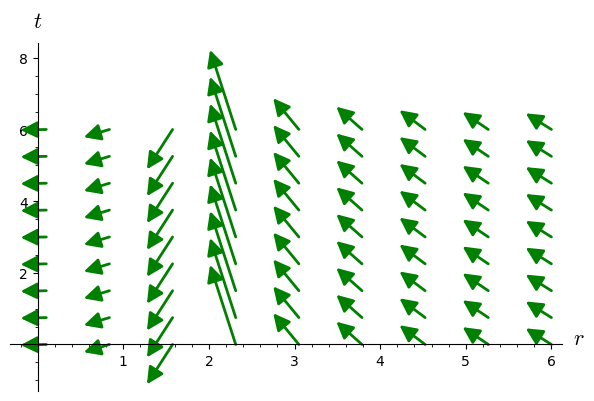

In [28]:
k.plot(ambient_coords=(r,t), fixed_coords={th: pi/2, ph: 0.0000000000001}, 
       ranges={t: (0, 6), r: (0.1, 6)}, number_values=9,
       parameters={m: 1}, color='green', scale=0.3)

In [29]:
#transition vectors between null geodesics from EF and non Null coordinates from X, 
#given that EF is unnafected by m, while X is
#EF are just straight horizontal lines (EF<r, r > to X<r, r> as p moves closer to m)

In [30]:
kp = k.at(p)#vector to alter p from X to EF coordinates 
kp.parent() is M.tangent_space(p)#since EF is null, the vectors are just the tangent ones to M

True

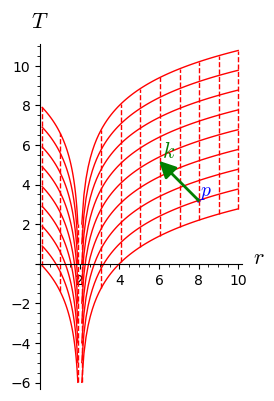

In [31]:
plot1 += kp.plot(EF, color='green', ambient_coords=(r,T), 
                 parameters={m: 1}, scale=2, label_offset=0.5, 
                 fontsize=16)
plot1

In [32]:
E = M.open_subset('E', coord_def = {X: r>2*m})
X.restrict(E).coord_range()

u = E.vector_field(name='u')
u[0] = 1/sqrt(1-2*m/r)#schwarzschild radius unppluged from X<t, t> to convert <T, T> to <t, t>
u.display()

u = 1/sqrt(-2*m/r + 1) ∂/∂t

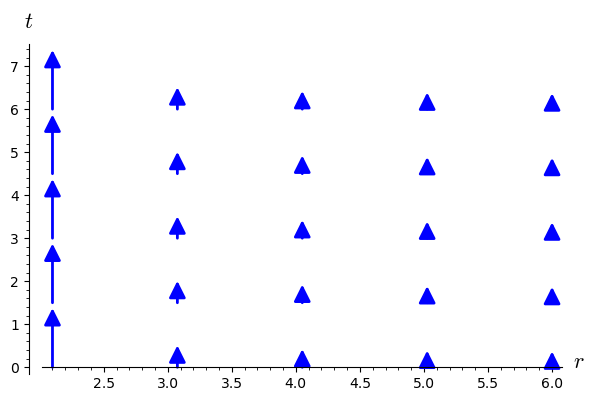

In [33]:
u.plot(ambient_coords=(r, t), fixed_coords={th: pi/2, ph: 0.0000000000001}, 
       ranges={t: (0, 6), r: (2.1, 6)}, number_values=5, 
       parameters={m: 1}, scale=0.3)#closer to the singularity, bigger the the time dialation vector(T->t) is

In [34]:
E3.<x,y,z> = EuclideanSpace()#chart X from a spherical to a cartesian coordinate system
X3 = E3.cartesian_coordinates()
to_E3 = M.diff_map(E3, {(X, X3): 
                        [r*sin(th)*cos(ph), r*sin(th)*sin(ph), r*cos(th)]})
to_E3.display()

M → E^3
   (t, r, th, ph) ↦ (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))

In [35]:
#the first parameter are the initial frame of p relative to the body
v0 = M.tangent_space(p)((1.3, 0, 0, 0.068/m), name='v_0')
s = var('s')
# integrate a path from p to  using g to create a vector space v0 and store in s
geod = M.integrated_geodesic(g, (s, 0, 1900), v0) #integrate s from (t = 0) to (t = 1900)
sol = geod.solve(parameters_values={m: 1}) 
interp = geod.interpolate()   

geod.plot_integrated(chart=X3, mapping=to_E3, plot_points=1000, 
                     thickness=2, label_axes=False) \
+ p.plot(chart=X3, mapping=to_E3, size=4, parameters={m: 1}) \
+ sphere(size=2, color='grey')

Graphics3d Object